## Decision Tree algo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
iris=sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [15]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


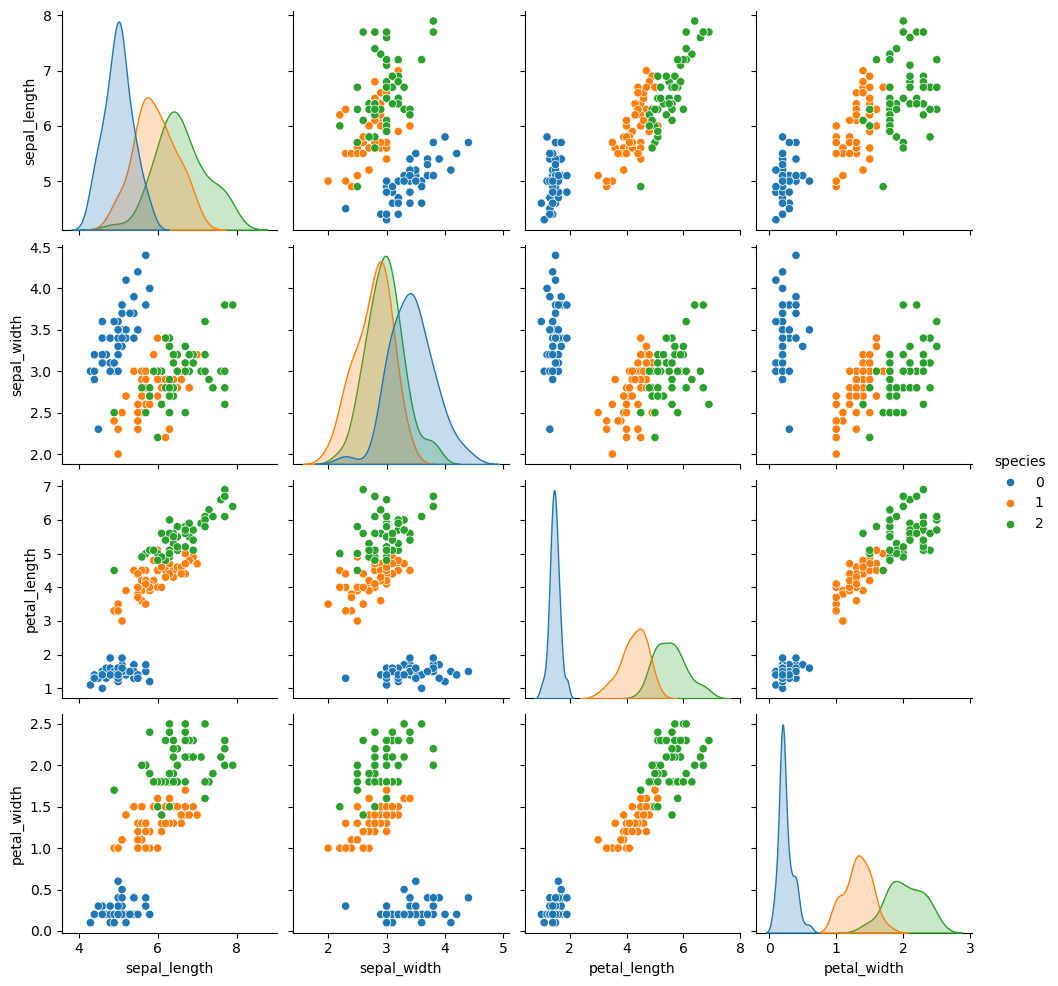

In [197]:
sns.pairplot(iris,hue='species',palette='tab10')
plt.show()

In [19]:
print("Checking any null values present here : ")
print(iris.isnull().sum())
print(iris.shape)


Checking any null values present here : 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


In [21]:
type(iris['species'].dtype)

numpy.dtypes.ObjectDType

In [23]:
print(iris['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [25]:
iris['species']=iris['species'].str.capitalize().map({'Setosa':0,'Versicolor':1,'Virginica':2})

In [27]:
x=iris.drop(columns=['species'])
y=iris['species']

In [29]:
from sklearn.model_selection import train_test_split as t
x_train,x_test,y_train,y_test=t(x,y,test_size=0.2,random_state=42)

In [31]:
print("Finding their Sizes : ")
print("The size of : ",x_train.shape)
print("The size of : ",x_test.shape)
print("The size of : ",y_train.shape)
print("The size of : ",y_test.shape)

Finding their Sizes : 
The size of :  (120, 4)
The size of :  (30, 4)
The size of :  (120,)
The size of :  (30,)


In [33]:
from sklearn.tree import DecisionTreeClassifier 

In [35]:
model=DecisionTreeClassifier()

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pre=model.predict(x_test)

In [47]:
x_test.shape

(30, 4)

In [61]:
print(len(y_pre))

30


In [63]:
acc=accuracy_score(y_test,y_pre)

In [145]:
print(acc*100)

100.0


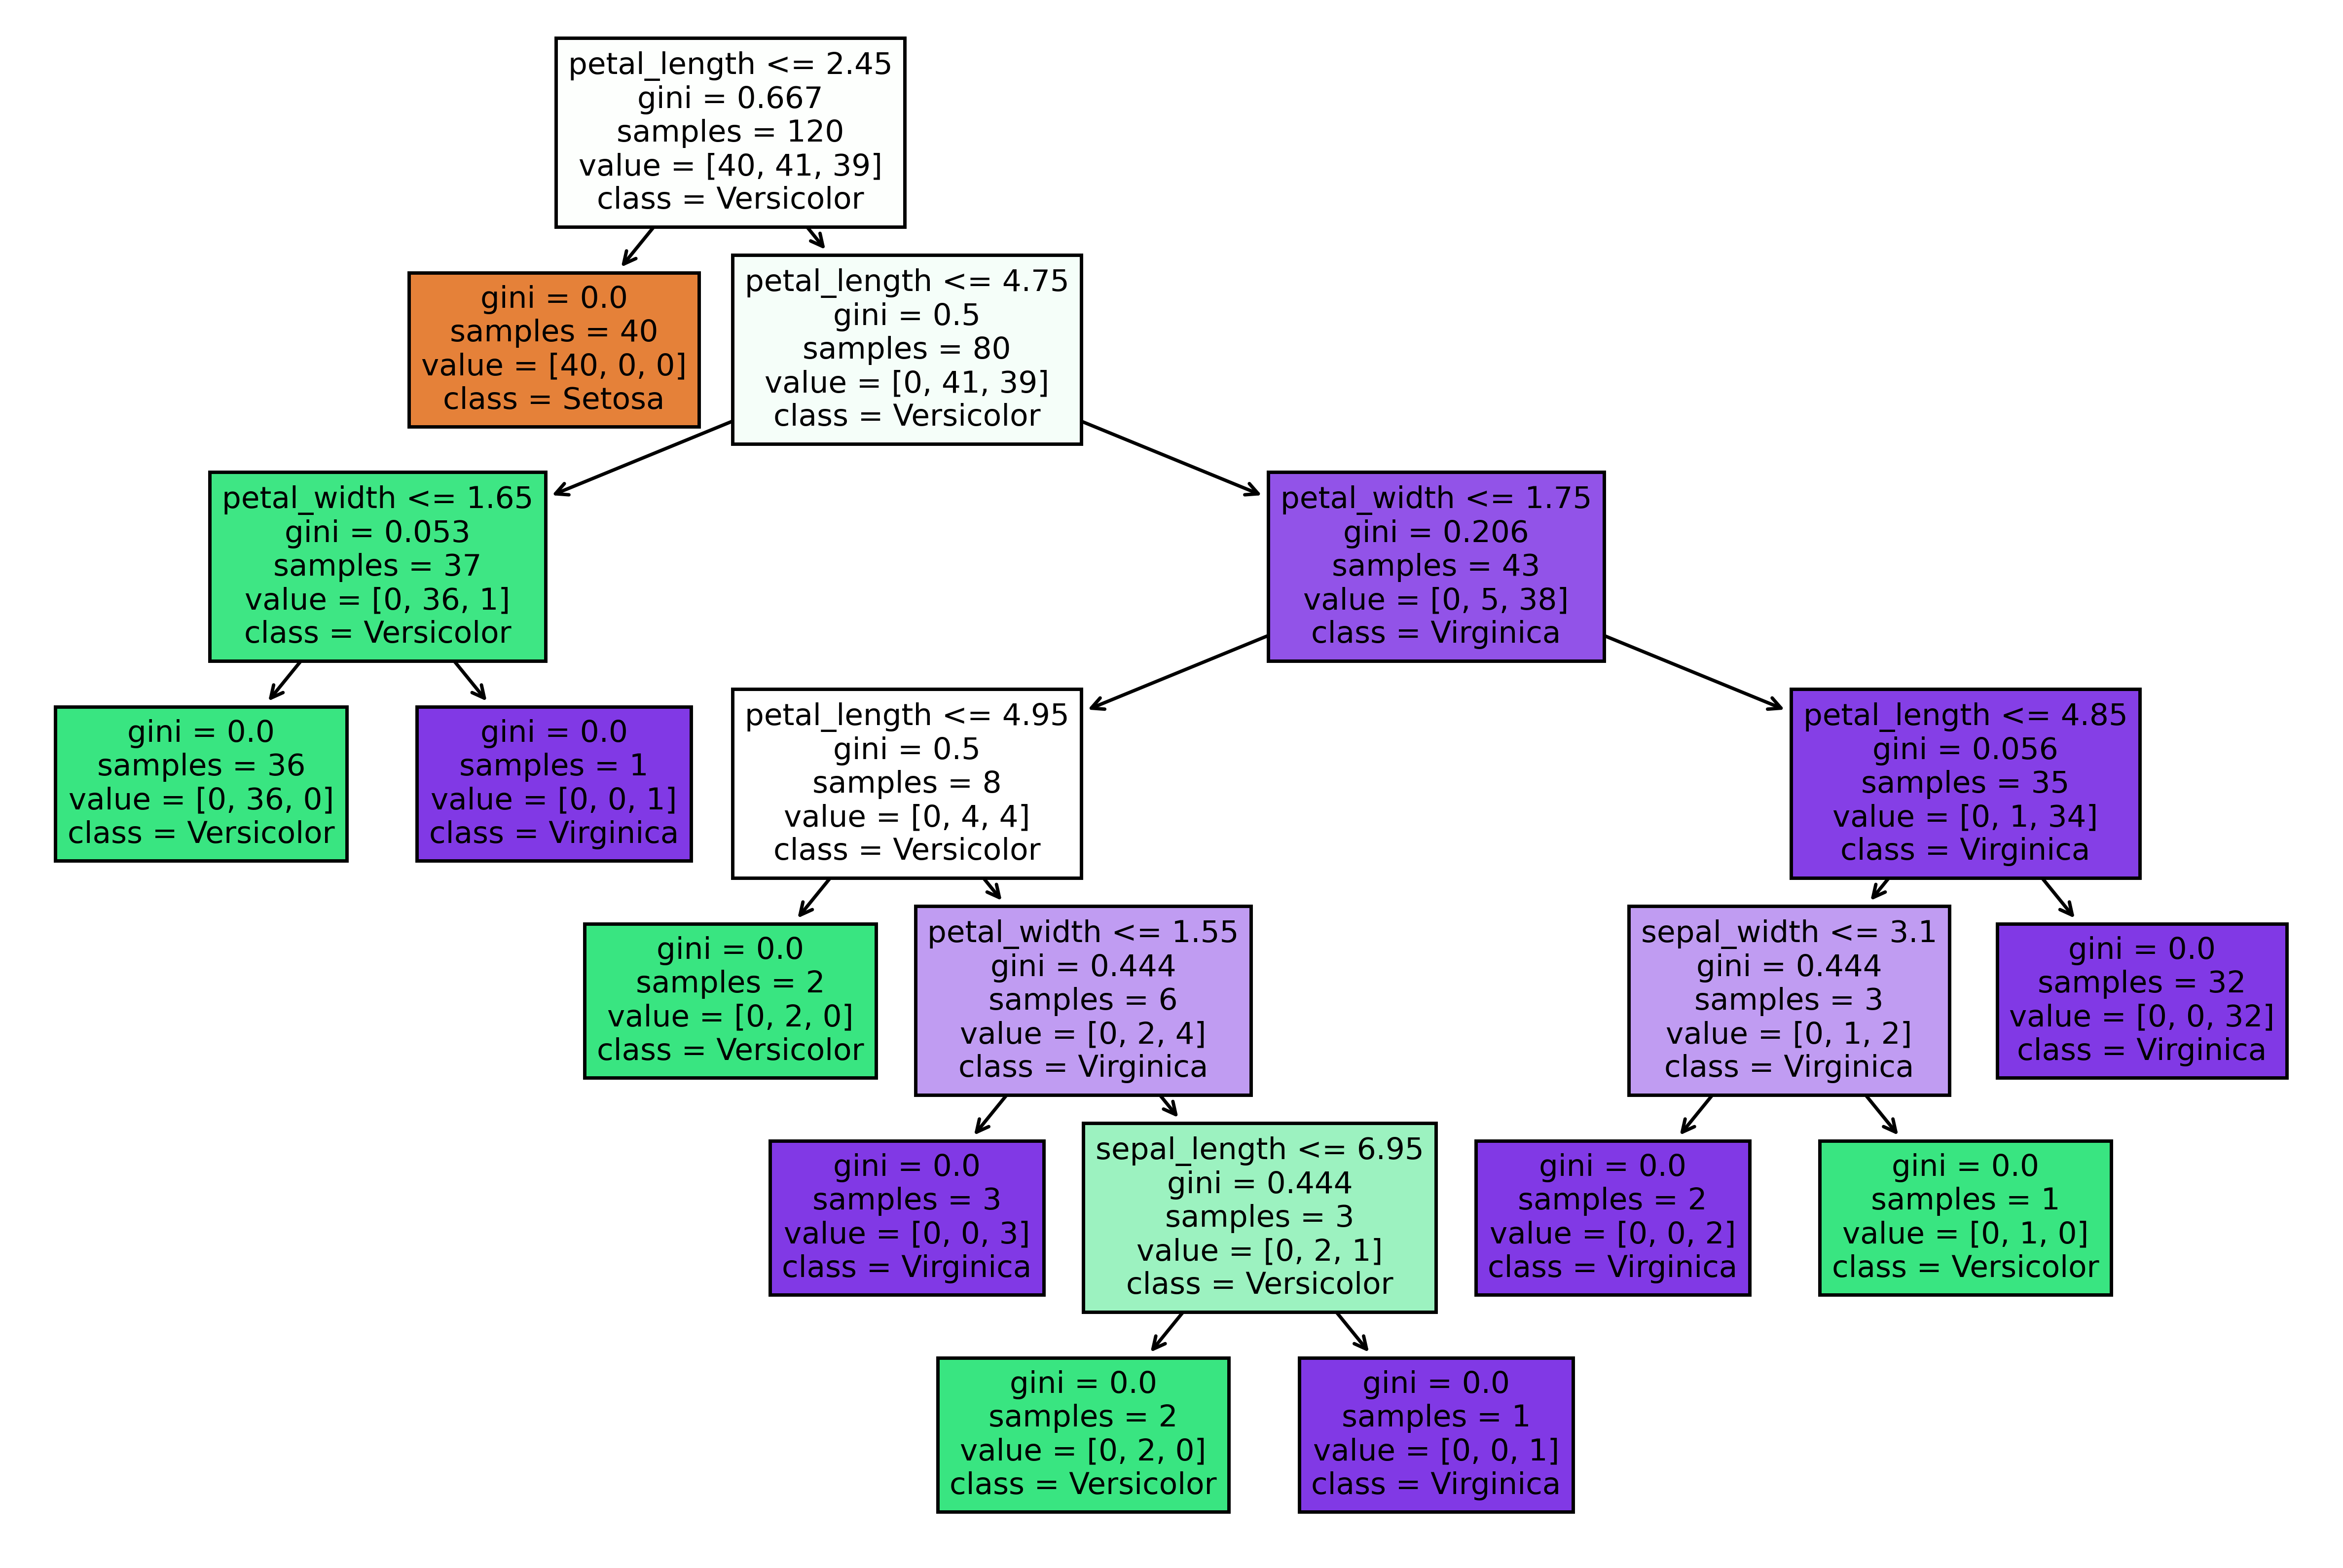

In [167]:
plt.figure(figsize=(12, 8),dpi=500) 
plot_tree(model, feature_names=x_test.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.show()

In [173]:
col=x_train.columns
data=pd.DataFrame([[5.8,4.5,5.3,5.9],[3,5.4,2.23,3.54]],columns=col)
pre=model.predict(data)
for i in pre:
    if(i==0):
        print('Setosa',end=" ")
    elif(i==1):
        print("Versicolor",end=" ")
    else:
        print("Verginica",end=" ")

Verginica Setosa 

## Done